# Netflix Data Analysis using Python


In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Set the style for plots
sns.set(style="darkgrid")

In [ ]:
# Step 2: Load the data
file_path = './netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

In [ ]:
netflix_data.shape

(8807, 12)

In [ ]:
#Explore the data
print("First few rows of the dataset:")
netflix_data.head()  # Display the first few rows of the dataset

First few rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print("\nDataset information:")
print(netflix_data.info())  # Get a concise summary of the data


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
print("\nMissing values in the dataset:")
print(netflix_data.isnull().sum())  # Check for missing values (NaN) in the dataset


Missing values in the dataset:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#Percentage of Null Values
round(netflix_data.isnull().sum()/len(netflix_data)*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [ ]:
# Top 10 Directors
netflix_data['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

Movies Vs TvShows

In [ ]:
fig = go.Figure(data=[go.Pie(labels=netflix_data['type'].value_counts(normalize=True).index, values=netflix_data['type'].value_counts(normalize=True).values, hole=.5, title = 'Movies VS TV Shows')])
fig.show()

In [ ]:
netflix_data.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
x = netflix_data.groupby('rating').size().reset_index(name='count')
x

,rating,count
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


In [ ]:
pieChart = px.pie(x, values='count', names='rating', title='Distribution of Content Ratings on Netflix')
pieChart.show()



1.  The Highest Count-TV-MA is the rating that shows that a program is intended for adults. "MA' stands for 'mature audiences. Children aged 17 and younger should not view these programs.
2.   Second largest is the 'TV-14'. A TV-14 program is meant for children over 14 years of age. It is generally not recommended to let children watch the program without parental attendance, or at least without them vetting it first. It can contain crude humor, the use of harmful substances, strong language, violence, and complex or upsetting themes.
3. Third largest is the very popular 'R' rating. R is the short for retricted, so any young person under 17 should not watch.   





In [ ]:
netflix_data.country.value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Year Wise Count

Text(0, 0.5, 'Count')

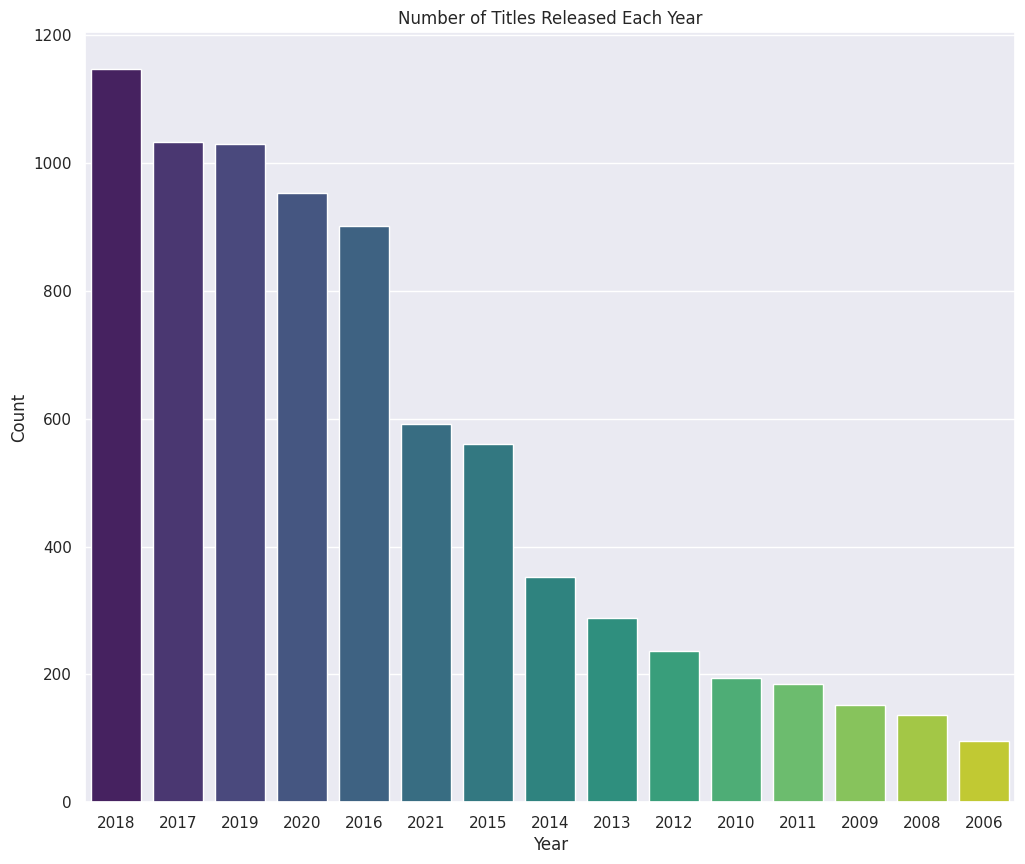

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='release_year', data=netflix_data, order =netflix_data.release_year.value_counts().index[0:15], palette='viridis')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')

Highest Releases in 2018 Followed by 2017 and 2019

**Handling Missing Values**

In [ ]:
round(netflix_data.isnull().sum()/len(netflix_data)*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [ ]:
#Dropping rows for small Percentage of Null
netflix_data.dropna(subset=["rating","duration","date_added"],axis=0,inplace=True)
netflix_data.shape

(8790, 12)

In [ ]:
round(netflix_data.isnull().sum()/len(netflix_data)*100,2).sort_values(ascending=False)

director        29.82
country          9.43
cast             9.39
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [ ]:
#replace missing values in COuntry by Unknown
netflix_data.country.fillna("Unknown",inplace=True)

In [ ]:
round(netflix_data.isnull().sum()/len(netflix_data)*100,2).sort_values(ascending=False)

director        29.82
cast             9.39
show_id          0.00
type             0.00
title            0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [ ]:
netflix_data["cast"].replace(np.NaN,'No Cast',inplace=True)

In [ ]:
netflix_data["director"].replace(np.NaN,'No Director',inplace=True)

In [ ]:
round(netflix_data.isnull().sum()/len(netflix_data)*100,2).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [ ]:
netflix_data["title"].head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [ ]:
movies_df = netflix_data.loc[(netflix_data['type'] == 'Movie')]
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
TVshows_df = netflix_data.loc[(netflix_data['type'] == 'TV Show')]
TVshows_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
movies_df.loc[:,['duration']] = movies_df.loc[:,['duration']].apply(lambda x: x.astype('int64',errors='ignore'))
movies_df.describe()

,release_year
count,6126.000000
mean,2013.120144
std,9.681723
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [ ]:
#Shortest Movie
Shortest_movie = movies_df[movies_df['duration'] == movies_df['duration'].min()]
Shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3535,s3536,Movie,American Factory: A Conversation with the Obamas,No Director,"President Barack Obama, Michelle Obama, Julia ...",United States,"September 5, 2019",2019,TV-G,10 min,Documentaries,Barack and Michelle Obama talk with directors ...


In [ ]:
#Longest Movie
Longest_movie = movies_df[movies_df['duration'] == movies_df['duration'].max()]
Longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu..."
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...
119,s120,Movie,Here and There,JP Habac,"Janine Gutierrez, JC Santos, Victor Anastacio,...",Unknown,"September 2, 2021",2020,TV-MA,99 min,"Dramas, International Movies, Romantic Movies",After meeting through a heated exchange on soc...
337,s338,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","August 1, 2021",2007,R,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."
344,s345,Movie,My Girl 2,Howard Zieff,"Anna Chlumsky, Austin O'Brien, Dan Aykroyd, Ja...",United States,"August 1, 2021",1994,PG,99 min,"Children & Family Movies, Comedies, Dramas",A teen makes surprising discoveries when she t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8441,s8442,Movie,The Nutcracker and the Four Realms,"Lasse Hallström, Joe Johnston","Mackenzie Foy, Keira Knightley, Helen Mirren, ...",United States,"May 28, 2019",2018,PG,99 min,Children & Family Movies,"When her late mother gifts her a key, Clara em..."
8497,s8498,Movie,The Sapphires,Wayne Blair,"Chris O'Dowd, Deborah Mailman, Jessica Mauboy,...",Australia,"April 26, 2019",2012,PG-13,99 min,"Comedies, Dramas, Independent Movies","Sisters Gail, Cynthia and Julie have talent, b..."
8540,s8541,Movie,The Tuxedo,Kevin Donovan,"Jackie Chan, Jennifer Love Hewitt, Jason Isaac...",United States,"November 1, 2019",2002,PG-13,99 min,"Action & Adventure, Comedies","After a government spy is hospitalized, New Yo..."
8625,s8626,Movie,Tremors 5: Bloodline,Don Michael Paul,"Michael Gross, Jamie Kennedy, Ernest Ndhlovu, ...","South Africa, United States","January 1, 2020",2015,PG-13,99 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",When he is hired to capture a deadly creature ...


In [ ]:
TVshows_df.duration = TVshows_df.duration.apply(lambda x: x.replace('Seasons','')if 'Seasons' in x else x)
TVshows_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
TVshows_df.duration = TVshows_df.duration.apply(lambda x: x.replace('eaon','')if 'eaon' in x else x)
TVshows_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
TVshows_df.describe()

,release_year
count,2664.000000
mean,2016.627628
std,5.735194
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [ ]:
TVshows_df.loc[:,['duration']] = TVshows_df.loc[:,['duration']].apply(lambda x: x.astype('int64',errors='ignore'))
TVshows_df.describe()

,release_year
count,2664.000000
mean,2016.627628
std,5.735194
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [ ]:
TVshows_df.duration.value_counts().tail(10)

duration
6      33
7      23
8      17
9       9
10      6
13      2
15      2
12      2
17      1
11      1
Name: count, dtype: int64

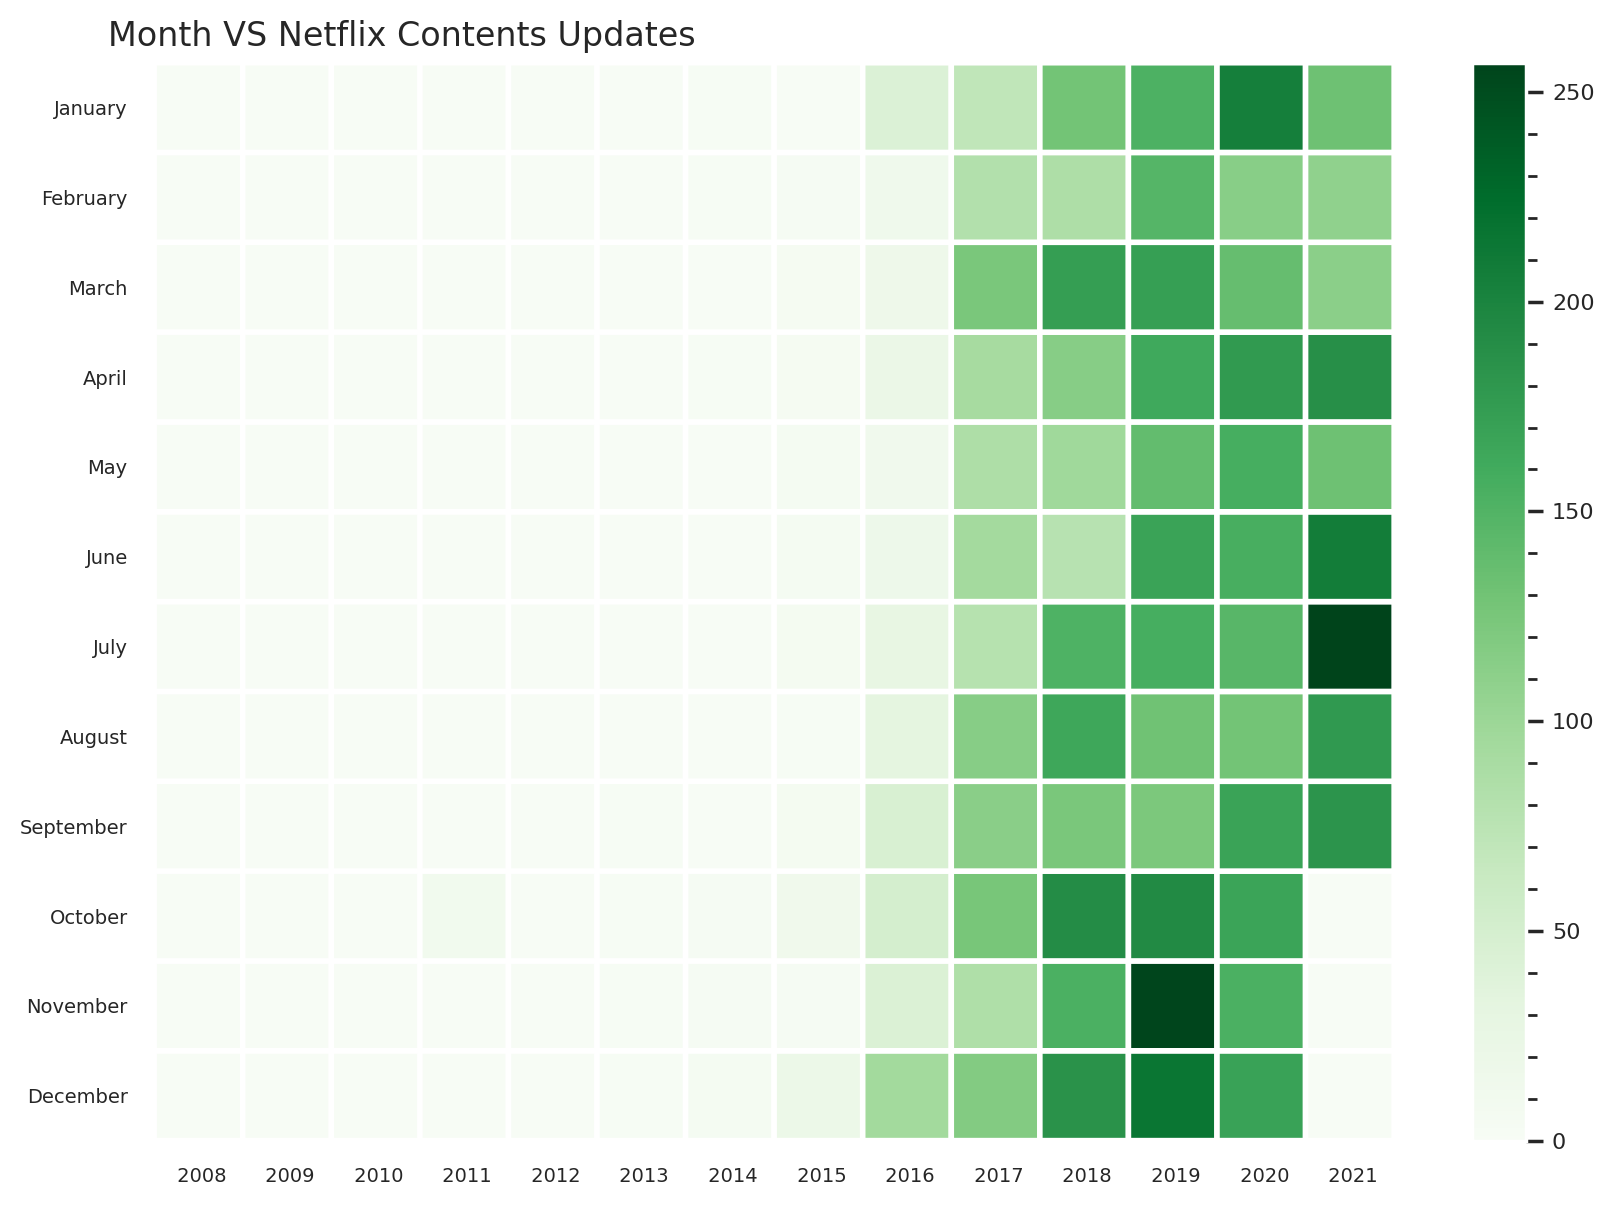

In [ ]:
netflix_date = netflix_data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
new_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7),dpi=200)
plt.pcolor(new_df, cmap='Greens', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(new_df.columns), 1), new_df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(new_df.index), 1), new_df.index, fontsize=7)

plt.title('Month VS Netflix Contents Updates', fontsize=12,position=(0.20,1.00+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()




In [ ]:
#  Non-Graphical Analysis
print("\nValue counts for 'type':")
netflix_data['type'].value_counts()  # Value counts for 'type'


Value counts for 'type':


type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [ ]:
print("\nUnique values in each column:")
for column in netflix_data.columns:
    print(f"{column}: {netflix_data[column].nunique()} unique values")


Unique values in each column:
show_id: 8790 unique values
type: 2 unique values
title: 8790 unique values
director: 4527 unique values
cast: 7679 unique values
country: 749 unique values
date_added: 1765 unique values
release_year: 74 unique values
rating: 14 unique values
duration: 220 unique values
listed_in: 513 unique values
description: 8758 unique values



Distribution of Titles by Type:


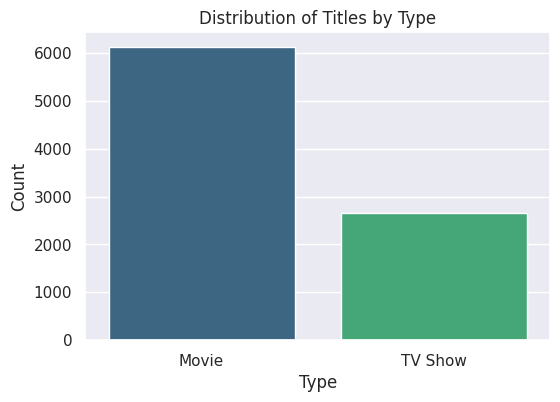

In [ ]:
# Visual Analysis
# Univariate Analysis
print("\nDistribution of Titles by Type:")
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=netflix_data, palette='viridis')
plt.title('Distribution of Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Insight: Movies are more prevalent than TV shows on Netflix. This indicates that Netflix has historically focused more on acquiring or producing movies compared to TV shows.


Number of titles released each year:


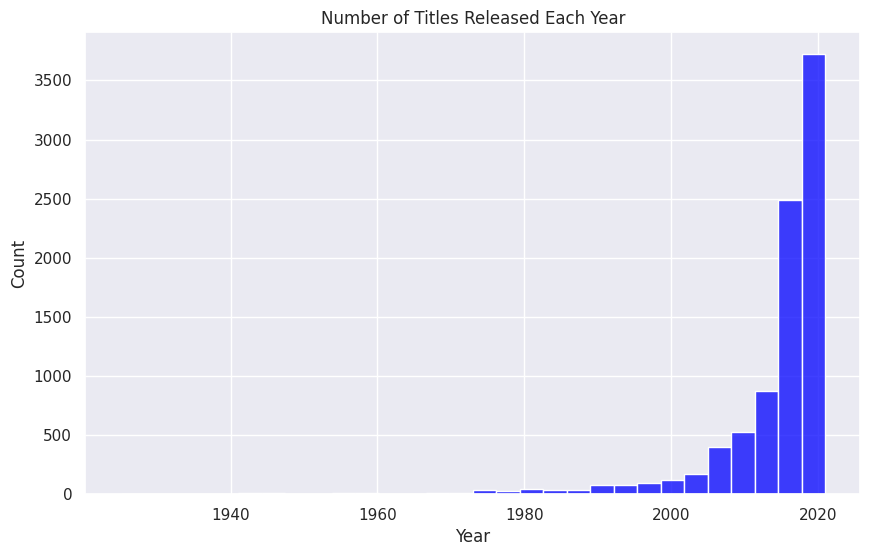

In [ ]:
print("\nNumber of titles released each year:")
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], kde=False, bins=30, color='blue')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Insight: The number of movies released per year has seen a significant increase, especially in the last decade, indicating a growing trend in movie production and acquisition by Netflix.


Number of titles released each year by type:


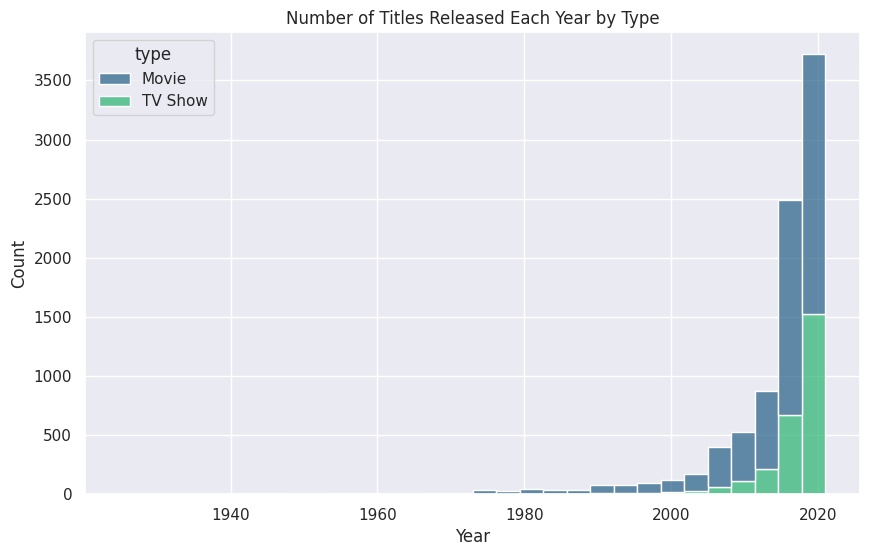

In [ ]:
# Bivariate Analysis
print("\nNumber of titles released each year by type:")
plt.figure(figsize=(10, 6))
sns.histplot(data=netflix_data, x='release_year', hue='type', multiple='stack', bins=30, palette='viridis')
plt.title('Number of Titles Released Each Year by Type')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analysis of Actors/Directors
# Let's focus on the top 10 actors and directors

from collections import Counter

# Function to get the top N elements from a column with list-like strings
def get_top_elements(column, n=10):
    all_elements = []
    netflix_data[column].dropna().apply(lambda x: all_elements.extend(x.split(', ')))
    return Counter(all_elements).most_common(n)

top_actors = get_top_elements('cast', 10)
top_directors = get_top_elements('director', 10)

In [ ]:

print("\nTop 10 actors:")
print(top_actors)


Top 10 actors:
[('No Cast', 825), ('Anupam Kher', 43), ('Shah Rukh Khan', 35), ('Julie Tejwani', 33), ('Naseeruddin Shah', 32), ('Takahiro Sakurai', 32), ('Rupa Bhimani', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Yuki Kaji', 29)]


In [ ]:
print("\nTop 10 directors:")
print(top_directors)



Top 10 directors:
[('No Director', 2621), ('Rajiv Chilaka', 22), ('Jan Suter', 21), ('Raúl Campos', 19), ('Suhas Kadav', 16), ('Marcus Raboy', 16), ('Jay Karas', 15), ('Cathy Garcia-Molina', 13), ('Youssef Chahine', 12), ('Martin Scorsese', 12)]


<Axes: title={'center': 'Top 10 Casts'}, xlabel='Total count', ylabel='Actors'>

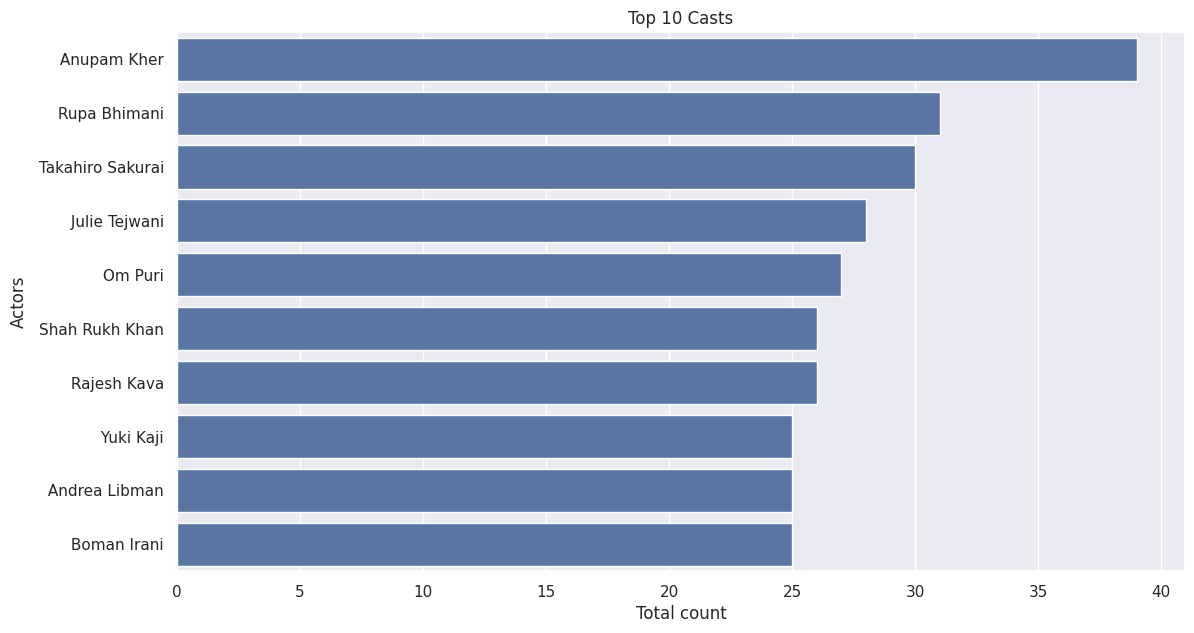

In [ ]:
cast_shows = netflix_data[netflix_data.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('cast')
cast_shows.columns = ['Actors']
plt.figure(figsize=(13,7))
plt.title('Top 10 Casts')
# Pass the 'cast' column of the DataFrame to sns.countplot
actors = cast_shows.groupby(['Actors']).size().reset_index(name='Total count')
sns.barplot(x='Total count', y='Actors', data=actors.sort_values(by='Total count', ascending=False).head(10))

Insight: Identifying the most frequently cast actors in movies and TV shows can highlight popular stars who attract viewership. This can guide future casting decisions to include these actors for better audience engagement.

In [ ]:
# Genre Analysis
print("\nTop 10 genres:")
top_genres = netflix_data['listed_in'].value_counts().head(10)
print(top_genres)


Top 10 genres:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


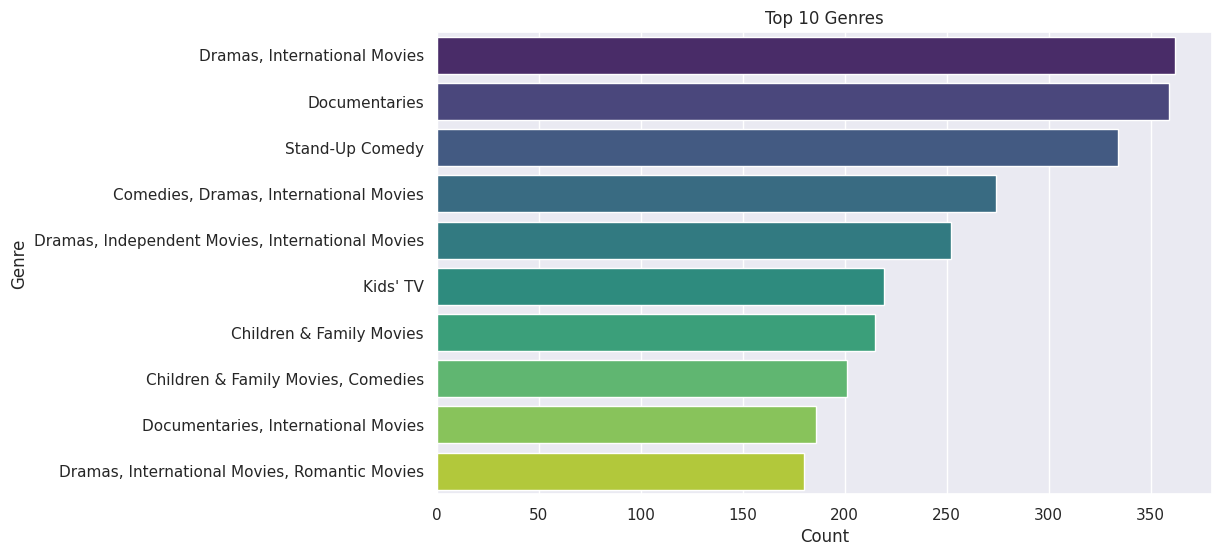

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()



Distribution of movie durations:


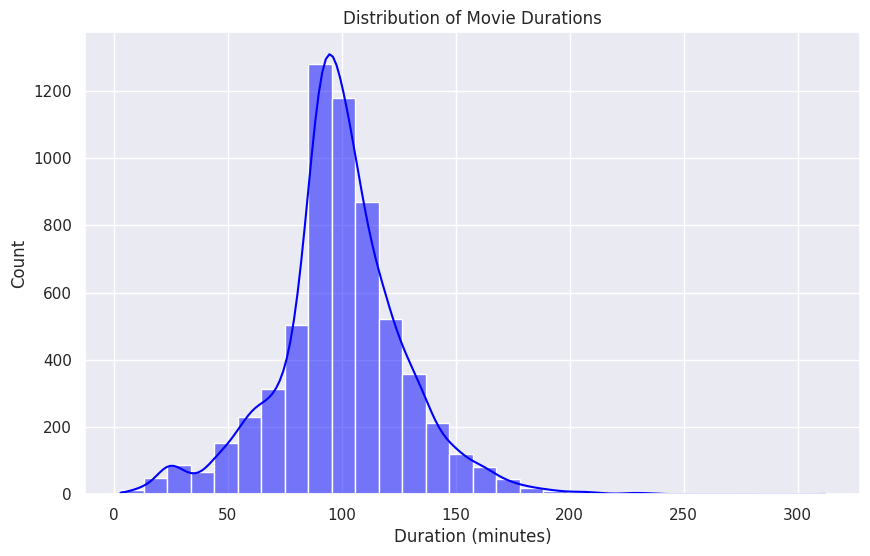

In [ ]:
# Duration Analysis (for Movies)
# Convert duration to numeric values for movies
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

print("\nDistribution of movie durations:")
plt.figure(figsize=(10, 6))
sns.histplot(netflix_movies['duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


In [ ]:
insights = {
    "Most titles on Netflix are movies.": "Netflix could explore increasing their series content to balance the distribution.",
    "The number of titles released each year has been increasing.": "Netflix should continue to invest in new content to maintain and grow its subscriber base.",
    "The USA is the leading country in terms of the number of titles.": "Netflix could focus on acquiring and producing more content from other countries to diversify its library.",
    "Drama, Comedy, and Documentaries are the most popular genres.": "Netflix should invest more in these genres, as they are highly popular among viewers.",
    "Most movies have a duration between 80 and 120 minutes.": "Netflix could consider producing more short films and mini-series to cater to viewers with less time.",
    "Certain actors and directors are frequently featured.": "Netflix should continue to collaborate with popular actors and directors to attract their fanbase.",
    "Most movies have a duration between 80 and 120 minutes.": "Netflix could consider producing more short films and mini-series to cater to viewers with less time."
}

print("\nInsights and Recommendations:")
for insight, recommendation in insights.items():
    print(f"- Insight: {insight}\n  Recommendation: {recommendation}\n")



Insights and Recommendations:
- Insight: Most titles on Netflix are movies.
  Recommendation: Netflix could explore increasing their series content to balance the distribution.

- Insight: The number of titles released each year has been increasing.
  Recommendation: Netflix should continue to invest in new content to maintain and grow its subscriber base.

- Insight: The USA is the leading country in terms of the number of titles.
  Recommendation: Netflix could focus on acquiring and producing more content from other countries to diversify its library.

- Insight: Drama, Comedy, and Documentaries are the most popular genres.
  Recommendation: Netflix should invest more in these genres, as they are highly popular among viewers.

- Insight: Most movies have a duration between 80 and 120 minutes.
  Recommendation: Netflix could consider producing more short films and mini-series to cater to viewers with less time.

- Insight: Certain actors and directors are frequently featured.
  Reco

# Netflix Data Analysis Insights

## Non-Graphical Analysis Insights

- **Value Counts for 'type'**: There are more movies than TV shows.
- **Unique Values**: Highlights the variety in the dataset, e.g., unique genres, countries, etc.

## Visual Analysis Insights

- **Distribution of Titles by Type**: Most titles are movies, suggesting a focus on movie content.
- **Number of Titles Released Each Year**: Shows growth in content over the years.
- **Top Countries with Most Titles**: The USA leads, followed by other countries, indicating content production hubs.
- **Distribution of Ratings by Type**: Various ratings across movies and TV shows.
- **Distribution of Movie Durations**: Most movies are between 80-120 minutes long.

## Analysis of Actors/Directors

- **Top 10 Actors/Directors**: Identifies popular actors and directors frequently featured in Netflix content.

## Genre Analysis

- **Top 10 Genres**: Drama, Comedy, and Documentaries are the most common genres.

## Business Insights

- **Increase Series Content**: To balance the distribution of movies and series.
- **Invest in New Content**: To maintain and grow the subscriber base.
- **Diversify Content Library**: Focus on acquiring and producing content from countries other than the USA.
- **Invest in Popular Genres**: Drama, Comedy, and Documentaries are highly popular.
- **Produce Short Films and Mini-Series**: To cater to viewers with less time.
- **Collaborate with Popular Actors and Directors**: To attract their fanbase.


# More Analysis

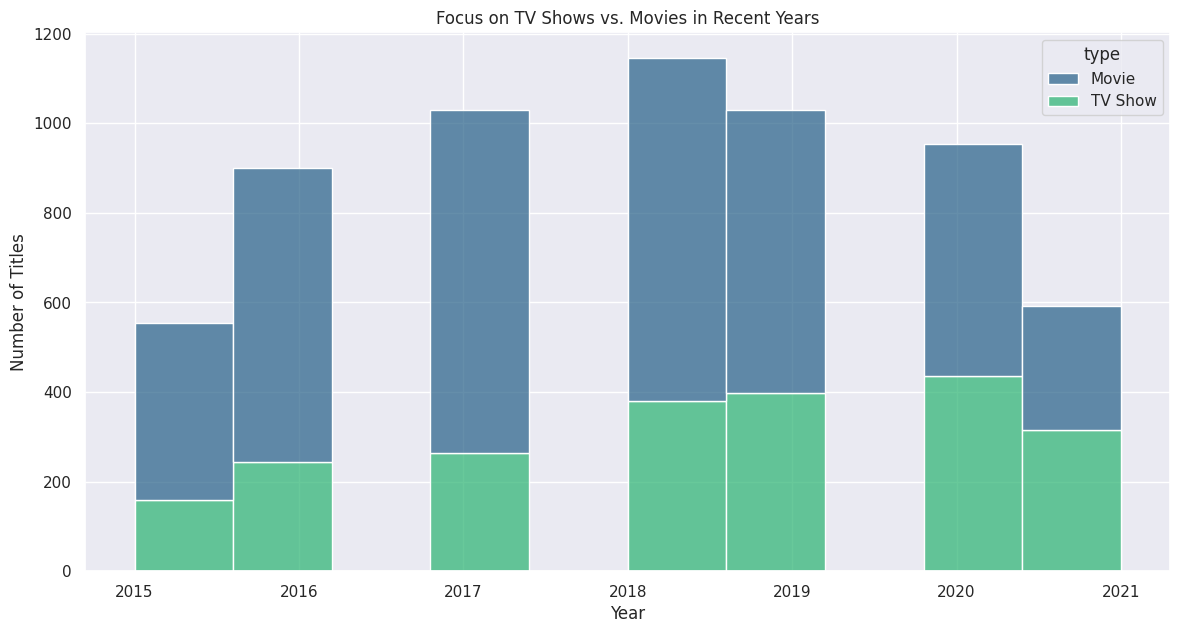

In [ ]:
# Focus on TV Shows vs. Movies in recent years
recent_years_data = netflix_data[netflix_data['release_year'] >= 2015]

plt.figure(figsize=(14, 7))
sns.histplot(data=recent_years_data, x='release_year', hue='type', multiple='stack', bins=10, palette='viridis')
plt.title('Focus on TV Shows vs. Movies in Recent Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


Insight: In recent years, there has been a noticeable increase in the number of TV shows compared to movies, suggesting that Netflix is shifting some of its focus towards producing or acquiring more TV show content.

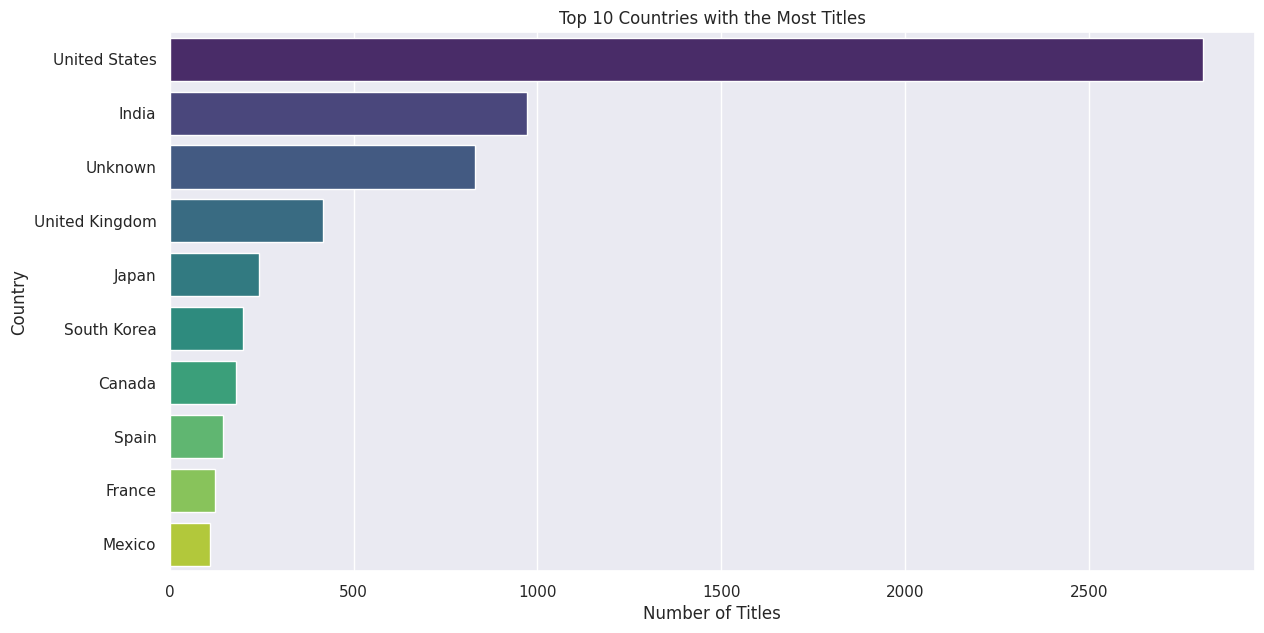

In [ ]:
# Content available in different countries
top_countries_content = netflix_data['country'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(y=top_countries_content.index, x=top_countries_content.values, palette='viridis')
plt.title('Top 10 Countries with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


Insight: The USA leads in terms of content available on Netflix, followed by other countries. This can help in understanding the distribution of content and guide strategic decisions to expand and diversify the content library for other regions.

## Summary and Recommendations
- Movie Releases Trend: The number of movies released each year has been increasing, especially in the last decade. Recommendation: Continue investing in movie content as it shows strong growth.

- TV Shows vs. Movies: Movies are more prevalent than TV shows. Recommendation: Balance the content library by increasing the production and acquisition of TV shows.

- Best Time to Launch TV Shows: Identifying peak months for TV show releases can help maximize viewership. Recommendation: Launch new TV shows during these peak periods.

- Actors/Directors Analysis: Popular actors and directors can attract more viewers. Recommendation: Collaborate with frequently featured actors and directors to draw their fanbase.

- Focus on TV Shows in Recent Years: There is a shift towards more TV shows. Recommendation: Maintain this focus and continue to diversify the content offerings with new TV shows.

- Content in Different Countries: The USA dominates in content availability. Recommendation: Diversify the content library by acquiring more titles from other countries to cater to a global audience.